In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data file
df = pd.read_csv(r'C:\Users\nihca\OneDrive\Documents\vscode\edaproject\Final_Augmented_dataset_Diseases_and_Symptoms.csv')
df=df[df['diseases'].notnull()]
df

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,open wound of the nose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#assigning numerical value for every disease
le=LabelEncoder()
df["diseases_encoded"]=le.fit_transform(df["diseases"])
df["diseases_encoded"]

0         531
1         531
2         531
3         531
4         531
         ... 
246940    506
246941    506
246942    506
246943    506
246944    506
Name: diseases_encoded, Length: 246945, dtype: int32

In [4]:
#applying scaler to normalize numerical value
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.drop(columns=["diseases","diseases_encoded"]))
scaled_data

array([[ 4.94844929, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       [ 4.94844929,  4.73220926,  3.25095032, ...,  0.        ,
        -0.00853792,  0.        ],
       ...,
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ],
       [-0.20208351, -0.21131779, -0.30760236, ...,  0.        ,
        -0.00853792,  0.        ]])

In [5]:
X = scaled_data
y = df["diseases_encoded"]

In [6]:
#splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#applying class weights to train model according to the frequency 
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [8]:
#model definition
rf_model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=60,    
    min_samples_split=2,
    class_weight=class_weight_dict,  
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 2.185644112050272,
                                     1: 0.7911227154046997,
                                     2: 1.1116638156117764,
                                     3: 19.838923478610162,
                                     4: 0.9277194432443602,
                                     5: 10.746083550913838,
                                     6: 8.319548555546197, 7: 4.029781331592689,
                                     8: 0.6562493771550435,
                                     9: 0.3532958975642906,
                                     10: 0.27119453756249434,
                                     11: 0.25998589236081865,
                                     12: 0.35870098083717955,
                                     13: 42.98433420365535,
                                     14: 1.44081567163...
                                     15: 0.3689642420914623,
                                     16: 0.47937919186232736,
                                     17: 0.2683725340498773,
                                     18: 0.6989322634740708,
                                     19: 0.3547537898513509,
                                     20: 0.35573242099576846,
                                     21: 4.605464378963074,
                                     22: 0.6229613652703674,
                                     23: 9.919461739305081,
                                     24: 128.95300261096605,
                                     25: 0.6097068681369554,
                                     26: 0.8924083225672391,
                                     27: 0.4988510739302362,
                                     28: 1.276762402088773,
                                     29: 0.35671646642037635, ...},
                       max_depth=60, random_state=42)

In [9]:
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8342


In [10]:
joblib.dump(rf_model, '____random_forest_model.joblib')

['____random_forest_model.joblib']

In [11]:
joblib.dump(scaler, '____scaler.joblib')
joblib.dump(le, '____label_encoder.joblib')

['____label_encoder.joblib']

# Random Forest Model Visualization and Evaluation

In this section, we'll visualize and evaluate our Random Forest model using various techniques.

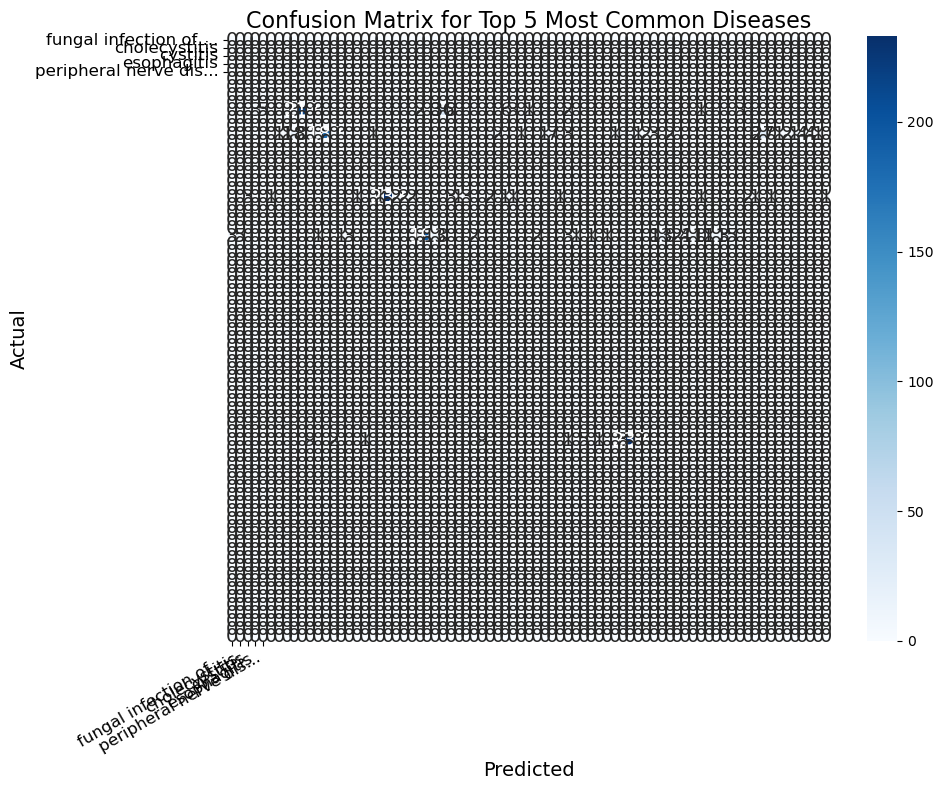

In [17]:
# Improved confusion matrix visualization
top_n = 5  # Using top 5 most common diseases
disease_counts = pd.Series(y_test).value_counts()
top_diseases_idx = disease_counts.index[:top_n]

# Filter test data
mask = np.isin(y_test, top_diseases_idx)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Create confusion matrix
cm_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)

# Get disease names
class_names_filtered = le.inverse_transform(top_diseases_idx)

# Improve display of disease names
formatted_names = [name[:20] + "..." if len(name) > 20 else name for name in class_names_filtered]

# Plot with better formatting
plt.figure(figsize=(10, 8))  # Adjusted size for 5 diseases
sns.heatmap(
    cm_filtered, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=formatted_names,
    yticklabels=formatted_names,
    annot_kws={"size": 14}  # Larger annotation font size
)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for Top 5 Most Common Diseases', fontsize=16)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=le.inverse_transform(sorted(np.unique(y_test))), output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the report
print('Classification Report:')
display(report_df.round(3))

ValueError: Number of classes, 739, does not match size of target_names, 724. Try specifying the labels parameter

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assume rf is your trained RandomForestClassifier or RandomForestRegressor
estimator = rf.estimators_[0]  # Pick the first tree

plt.figure(figsize=(20,10))
tree.plot_tree(estimator, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

KeyboardInterrupt: 